#  Problem Definition

The primary goal of this project is to build a machine learning model that can accurately predict the likelihood of a customer defaulting on a loan. By analyzing various financial and personal attributes of customers from a synthetic dataset, this model aims to provide a reliable "default risk" score. This can help financial institutions make more informed lending decisions, minimizing potential losses.

# Table of Contents

Problem Definition

Importing Necessary Libraries

Data Loading & Inspection

Exploratory Data Analysis (EDA)

Data Preprocessing & Feature Engineering

Model Training & Hyperparameter Tuning

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

Support Vector Machine (SVM)

XGBoost Classifier

Conclusion


# Project Abstract

This project presents a machine learning model designed to predict the likelihood of a customer defaulting on a loan. Using a synthetic dataset of 10,000 customer records, this model analyzes various financial and personal attributes to provide a reliable "default risk" score.

The workflow involved comprehensive Exploratory Data Analysis (EDA), robust feature engineering, and rigorous preprocessing using Scikit-Learn pipelines to handle outliers, scaling, and encoding. Several classification algorithms were trained and evaluated, including Logistic Regression, Decision Trees, Random Forest, SVM, and XGBoost.

After systematic hyperparameter tuning with GridSearchCV, the XGBoost Classifier emerged as the champion model, achieving a final accuracy of 96% on the unseen test set. This high-performing model demonstrates a strong potential to help financial institutions make more informed lending decisions and minimize potential losses from loan defaults.

# Importing Necessary Librarys

# For data reading and plotting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For Preprocessing 

In [3]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn pipeline to handle SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# For Model Training & Tuning

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# For Model Evaluation

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Data Loading 

In [6]:
# Use forward slashes instead of backslashes
df = pd.read_csv("synthetic_dataset_10000x20.csv")

In [7]:
# copying data to keep orginal data unchanged
df_process=df.copy()

#  Data Inspection

In [8]:
# Top 5 rows of dataset
df_process.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


In [9]:
df_process.shape

(10000, 21)

In [10]:
# To know types of data avilable in datase like "integer,float,object" etc... types of data avilable in dataset
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10000 non-null  object 
 1   age                  10000 non-null  int64  
 2   income               9682 non-null   float64
 3   savings              9689 non-null   float64
 4   monthly_expenses     9675 non-null   float64
 5   num_dependents       10000 non-null  int64  
 6   credit_score         9674 non-null   float64
 7   loan_amount          10000 non-null  float64
 8   loan_term_months     10000 non-null  int64  
 9   employment_years     10000 non-null  float64
 10  home_ownership       10000 non-null  object 
 11  education            10000 non-null  object 
 12  marital_status       10000 non-null  object 
 13  region               10000 non-null  object 
 14  recent_default       10000 non-null  int64  
 15  has_credit_card      10000 non-null  

In [11]:
# Descriptive Statistics 
df_process.describe()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,has_credit_card,signup_dayofweek,debt_to_income,sin_age,target_default_risk
count,10000.000000,9682.000000,9689.000000,9675.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.861600,59712.871411,5039.922489,2082.209612,1.214200,650.155438,16214.796900,45.642000,5.39701,0.047000,0.694800,3.011900,0.358156,-0.100387,0.513200
std,16.457987,39865.231489,5041.793583,1385.991787,1.108982,69.918297,16081.646814,15.475134,3.41370,0.211649,0.460515,2.003986,0.302606,0.667428,0.499851
min,18.000000,20001.000000,0.000000,200.000000,0.000000,363.077116,1000.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.004000,-0.999923,0.000000
25%,32.000000,31300.500000,1476.000000,1471.000000,0.000000,602.189895,8508.500000,36.000000,2.70000,0.000000,0.000000,1.000000,0.132000,-0.756802,0.000000
50%,46.000000,47301.500000,3499.000000,2007.000000,1.000000,649.808322,15174.500000,48.000000,5.10000,0.000000,1.000000,3.000000,0.275000,-0.157746,1.000000
75%,60.000000,75164.250000,6986.000000,2557.000000,2.000000,697.537432,21843.750000,60.000000,7.70000,0.000000,1.000000,5.000000,0.508000,0.515501,1.000000
max,74.000000,402769.000000,44644.000000,28664.000000,7.000000,850.000000,441190.000000,72.000000,21.50000,1.000000,1.000000,6.000000,2.031000,0.973848,1.000000


In [12]:
# To find the number of nullvalues present in dataset
df_process.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

In [13]:
# To find any duplicates present in data
df_process.duplicated().sum()

0

# Exploration Data Analysis(EDA)  

In [14]:
#collecting numerical fetures
numerical_features=df_process.select_dtypes(include=[np.number]).columns

In [15]:
numerical_features

Index(['age', 'income', 'savings', 'monthly_expenses', 'num_dependents',
       'credit_score', 'loan_amount', 'loan_term_months', 'employment_years',
       'recent_default', 'has_credit_card', 'signup_dayofweek',
       'debt_to_income', 'sin_age', 'target_default_risk'],
      dtype='object')

In [16]:
categorical_features=df_process.select_dtypes(exclude=[np.number]).columns

In [17]:
categorical_features

Index(['customer_id', 'home_ownership', 'education', 'marital_status',
       'region', 'signup_date'],
      dtype='object')

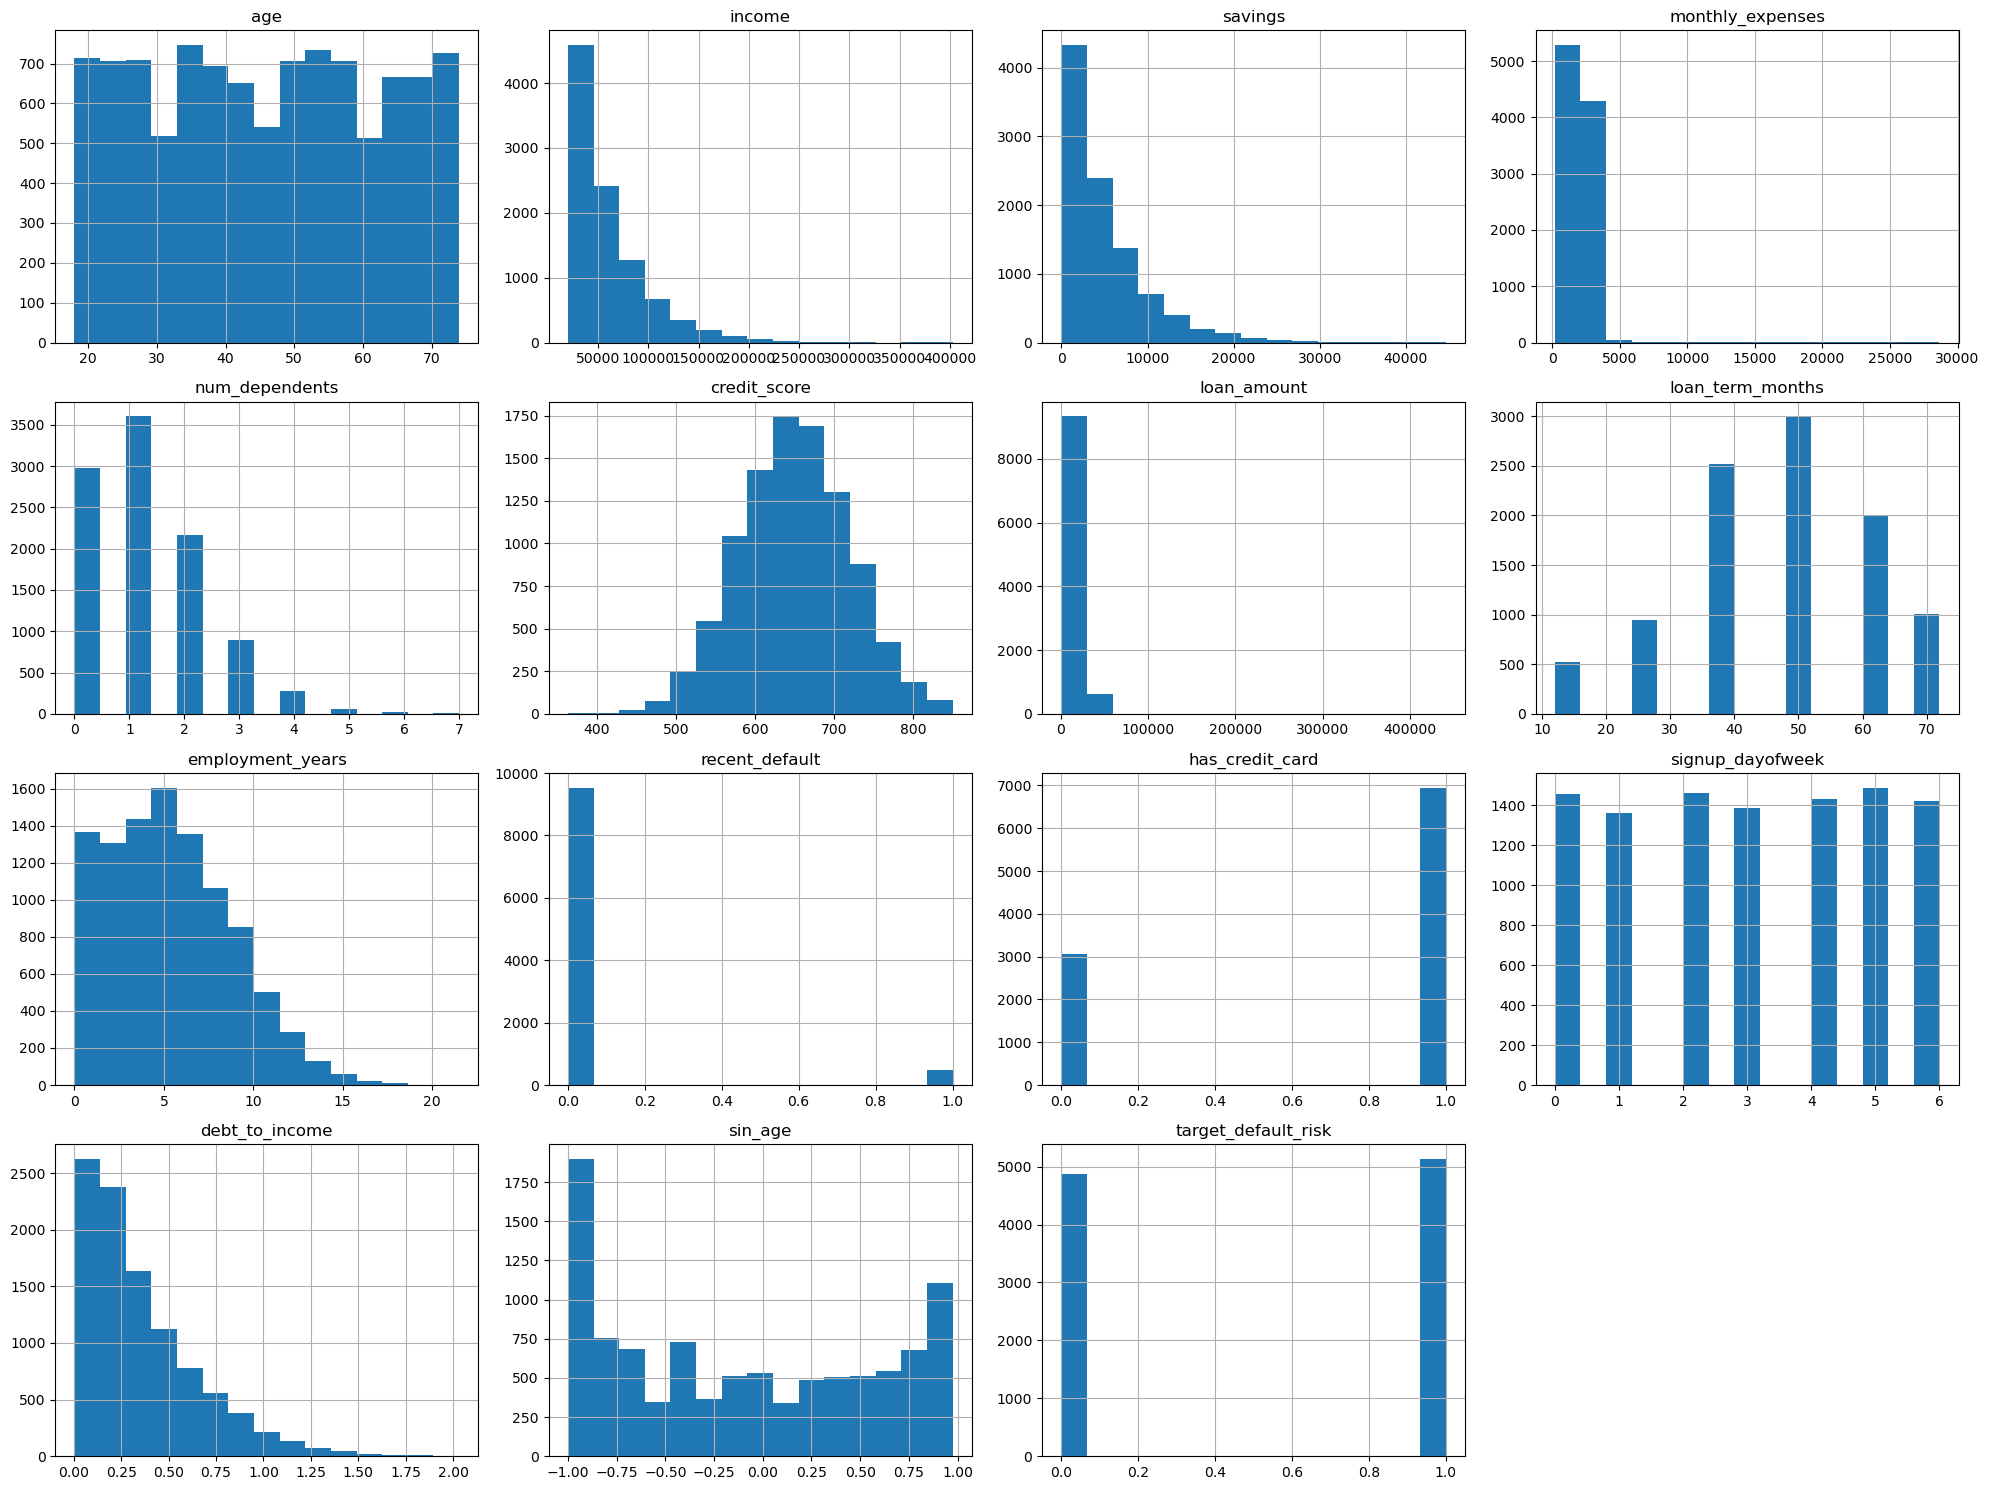

In [18]:
# --> plotting histplots to find the distribution of data
df_process.hist(bins=15,figsize=(20, 15),layout=(4,4))
plt.tight_layout()  #--> automatically adjusts subplots so that the subplots fits neatly

age → Spread between ~20 to 70 years, fairly uniform with some small peaks.
        
 income → Right-skewed (most people earn lower incomes, a few very high earners).
        
savings → Strongly right-skewed (majority with low savings, very few with very high savings).
        
 monthly_expenses → Also right-skewed (most people have low to moderate expenses, a few outliers with very high expenses).
        
num_dependents → Most people have 0–2 dependents, very few above 5.
        
credit_score → Normal distribution centered around 600–700, which looks realistic.
        
loan_amount → Highly right-skewed (majority take smaller loans, very few take extremely large loans).
        
loan_term_months → Discrete clusters, likely due to fixed loan terms (12, 24, 36, 48, 60 months, etc.).
        
employment_years → Skewed toward lower years (many people with 0–10 years of employment, fewer with very long careers).
        
recent_default (binary 0/1) → Most customers haven’t defaulted recently, small group has.
        
has_credit_card (binary 0/1) → Majority have credit cards, some don’t.
        
signup_dayofweek → Fairly uniform distribution (people sign up across all days of the week).
        
debt_to_income → Right-skewed, most customers have low debt-to-income ratio, a few with very high ratios.
        
sin_age → A sine transformation of age (cyclical encoding). It shows repeating patterns but not normally distributed (expected behavior).
        
target_default_risk (binary 0/1) → This is the label column. Imbalanced dataset (majority = 0 → low risk, minority = 1 → high risk).m

### Key Observations from Data Distributions:
* **Skewed Financial Features:** `income`, `savings`, `monthly_expenses`, and `loan_amount` are all right-skewed. This is typical in financial data, where a majority of individuals have lower to moderate values, and a few have very high values (outliers). These outliers were handled later using capping to prevent them from skewing the model.
* **Target Variable Balance:** The `target_default_risk` column is fairly balanced (~51% vs. ~49%), which is excellent. This means we don't need to apply techniques like SMOTE for handling class imbalance.
* **Correlations:** The heatmap reveals a strong positive correlation (0.64) between `income` and `target_default_risk`. This is a surprising insight, suggesting that in this dataset, higher-income individuals might be associated with higher default risk. This could be a key feature for the model.

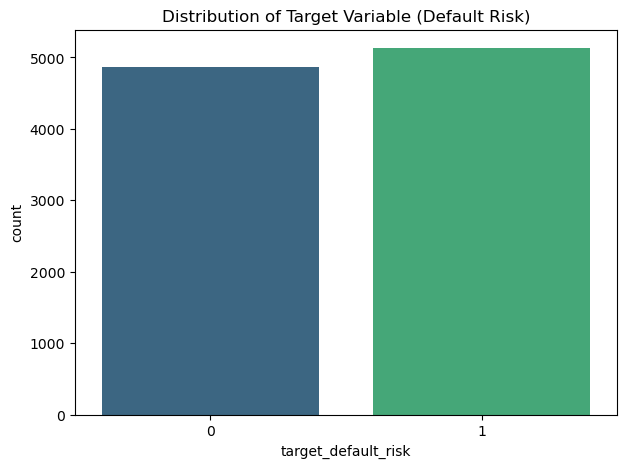

In [19]:
# This helps check for class imbalance
plt.figure(figsize=(7, 5))
sns.countplot(x='target_default_risk', data=df_process, palette='viridis')
plt.title('Distribution of Target Variable (Default Risk)')
plt.show()

By bar chart we can say that target column is fairly balanced and we no need to apply (smote)--> smote is a technique used to balance imbalanced data 

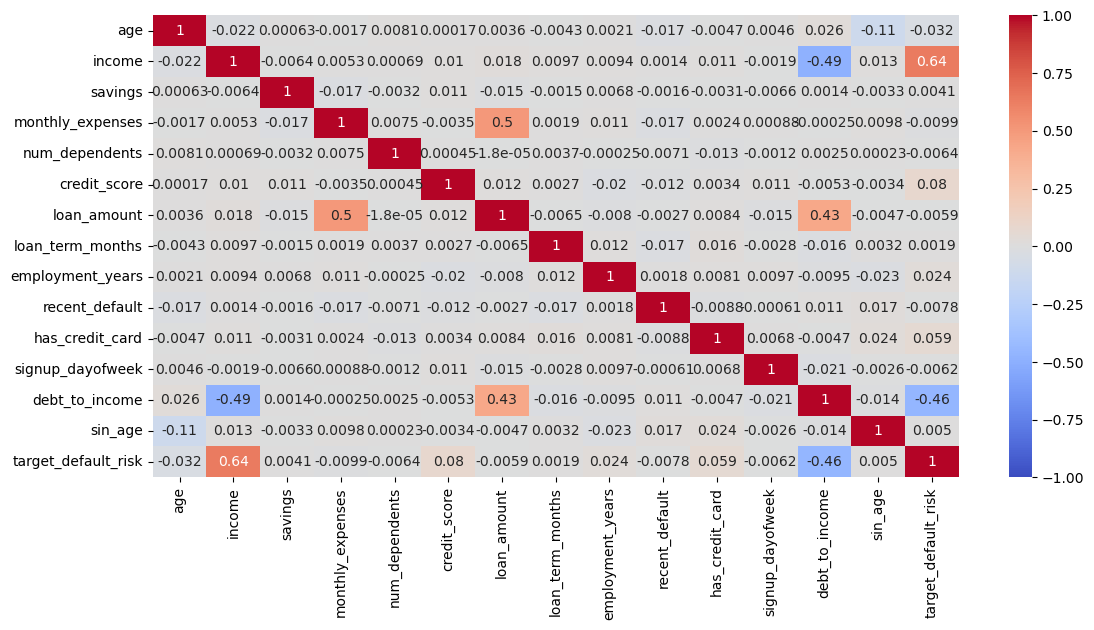

In [20]:
# heat map to find the co-relations
plt.figure(figsize=(13,6))
sns.heatmap(df_process.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

strong Correlations:

monthly_expenses ↔ loan_amount = 0.50
→ Moderate positive relation. People with higher monthly expenses tend to take larger loans.

income ↔ target_default_risk = 0.64
→ Strong positive relation. As income increases, default risk also increases (surprising, but could mean high-income people borrow more aggressively).

debt_to_income ↔ loan_amount = 0.43
→ Moderate positive relation. Higher loan amounts push debt-to-income higher.

debt_to_income ↔ target_default_risk = –0.46
→ Moderate negative relation. Higher debt-to-income seems associated with lower default risk (counter-intuitive → may need deeper check / data quality review).

Weak Correlations:

→ Most features (age, savings, num_dependents, employment_years, etc.) show very weak correlations (< 0.1).

→ This means they don’t have strong linear effects, but they may still add predictive value in ML models.

No Multicollinearity Problem:

→ No pairs ≥ 0.9 → no duplicate features.

→ Only moderate pairs around 0.5.

→ Safe to keep most features without dropping.

In [21]:
# dividing numerical features into two parts of list because plotting boxplot in loop is not make good sence to understand
num_fer1=['age','income','savings','monthly_expenses','num_dependents','credit_score','loan_amount']
num_fer2=['loan_amount','loan_term_months','employment_years','recent_default','has_credit_card','signup_dayofweek','debt_to_income','sin_age']

Text(0.5, 1.0, 'box plot for num_fer1')

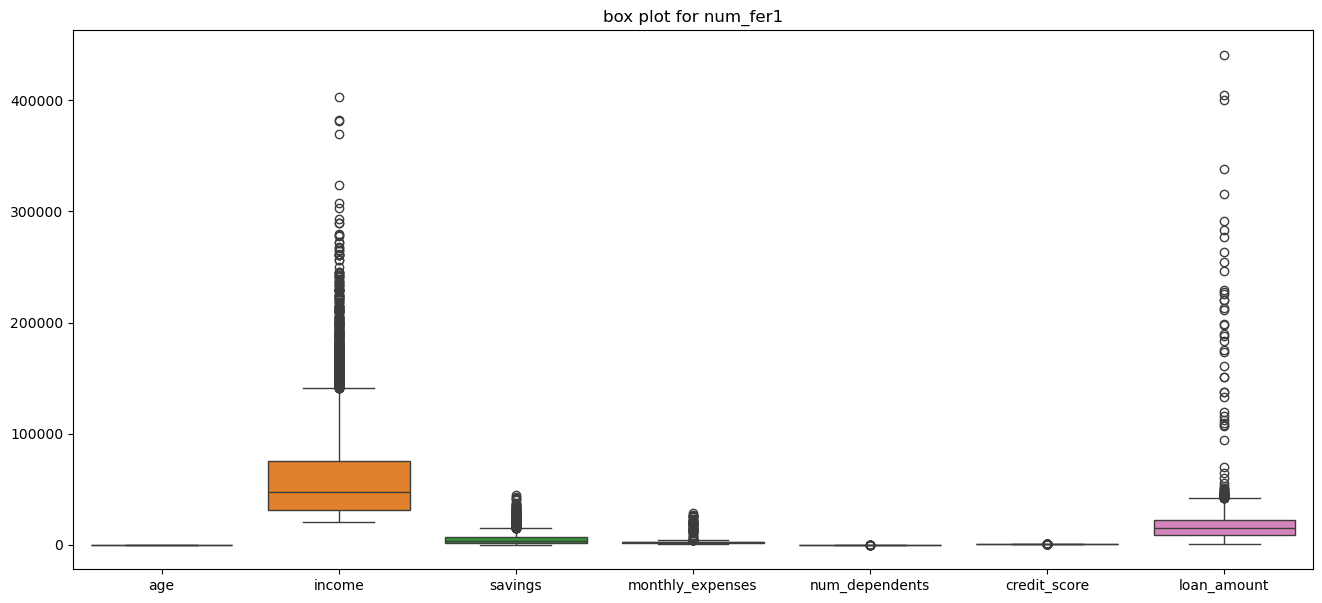

In [22]:
# finding outliers for num_fer1 
plt.figure(figsize=(16,7))
sns.boxplot(data=df_process[num_fer1])
plt.title("box plot for num_fer1")

Text(0.5, 1.0, 'box plot for num_fer2')

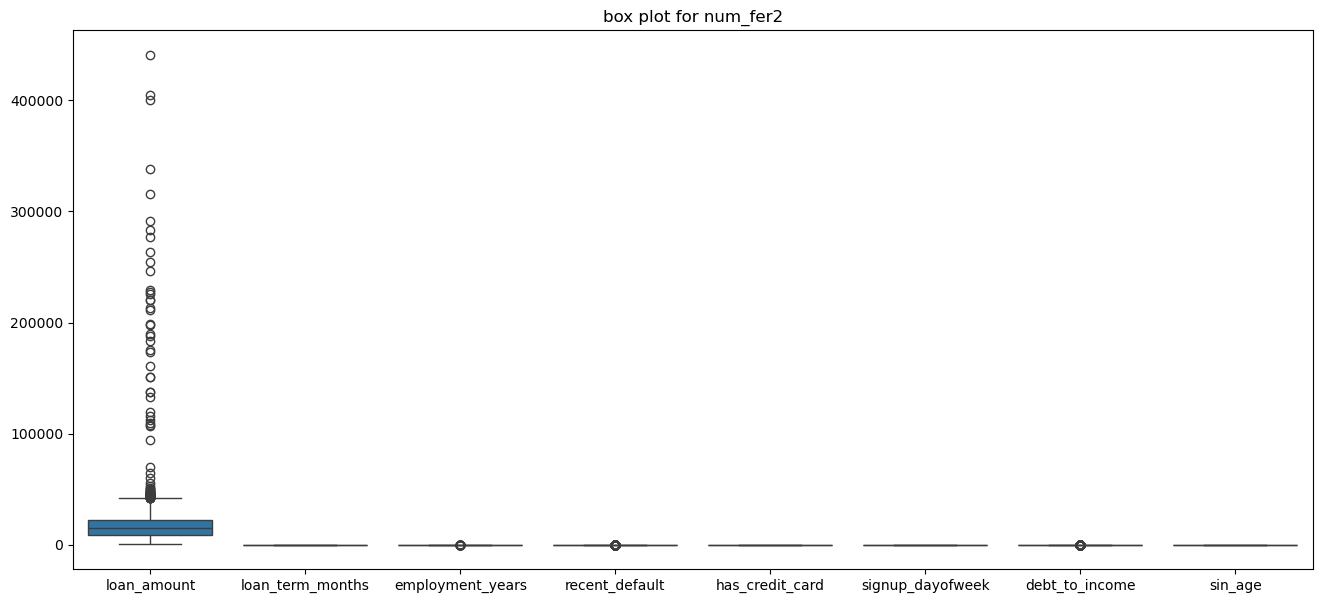

In [23]:
# finding outliers for num_fer1 
plt.figure(figsize=(16,7))
sns.boxplot(data=df_process[num_fer2])
plt.title("box plot for num_fer2")

In [24]:
# to find value(sub-categories in features) counts in each feature with "normalize=True"
for i in categorical_features:
    print(df_process[i].value_counts(normalize=True)) #--> normalize=True helps to find percentage of sub-categories data this help to know our data is imbalanced or balanced.
    print("\n")

customer_id
CUST006253    0.0001
CUST001238    0.0001
CUST001308    0.0001
CUST009430    0.0001
CUST000999    0.0001
               ...  
CUST002729    0.0001
CUST009598    0.0001
CUST004986    0.0001
CUST006847    0.0001
CUST007271    0.0001
Name: proportion, Length: 10000, dtype: float64


home_ownership
RENT        0.4524
OWN         0.2526
MORTGAGE    0.2498
OTHER       0.0452
Name: proportion, dtype: float64


education
Bachelors    0.4443
HS           0.2546
Masters      0.1962
Other        0.0500
PhD          0.0462
Bachlors     0.0087
Name: proportion, dtype: float64


marital_status
Single      0.4486
Married     0.4002
Divorced    0.1000
Widowed     0.0512
Name: proportion, dtype: float64


region
East     0.2553
South    0.2523
North    0.2479
West     0.2445
Name: proportion, dtype: float64


signup_date
2018-06-22    0.0014
2021-04-14    0.0013
2021-01-27    0.0013
2021-11-14    0.0013
2022-05-07    0.0012
               ...  
2023-04-16    0.0001
2022-05-31    0.0001
2020

In [25]:
# to find target feature is balance or imbalanced
df_process["target_default_risk"].value_counts(normalize=True)

target_default_risk
1    0.5132
0    0.4868
Name: proportion, dtype: float64

Text(0, 0.5, '')

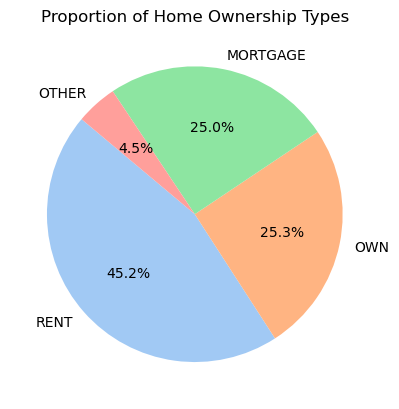

In [26]:
# To find the customers HomeOwnershipStats
ownership_counts = df_process['home_ownership'].value_counts()
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Home Ownership Types')
plt.ylabel('')

Text(0.5, 1.0, 'Proportion of Home Ownership Types')

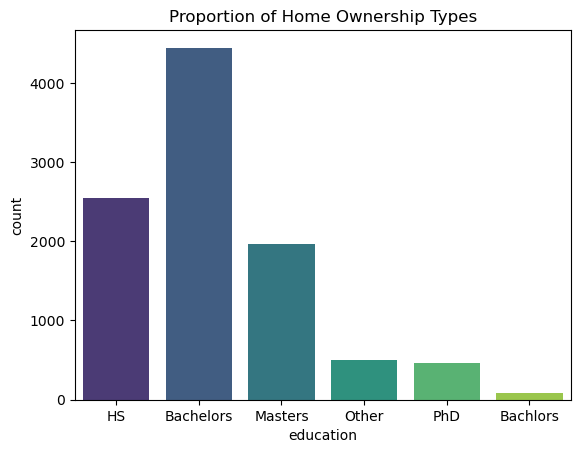

In [27]:
sns.countplot(x = "education",data=df,palette='viridis')
plt.title('Proportion of Home Ownership Types')

Text(0.5, 1.0, '# Marital Status distribution')

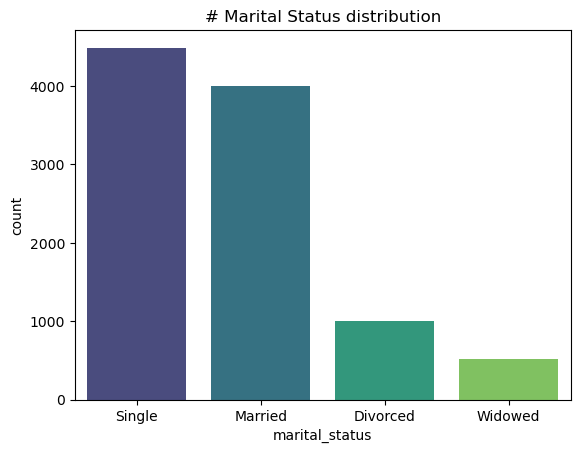

In [28]:
# to find Marital Status distribution
sns.countplot(x = "marital_status",data=df_process,palette='viridis')
plt.title('# Marital Status distribution')

Text(0.5, 1.0, 'Region distribution')

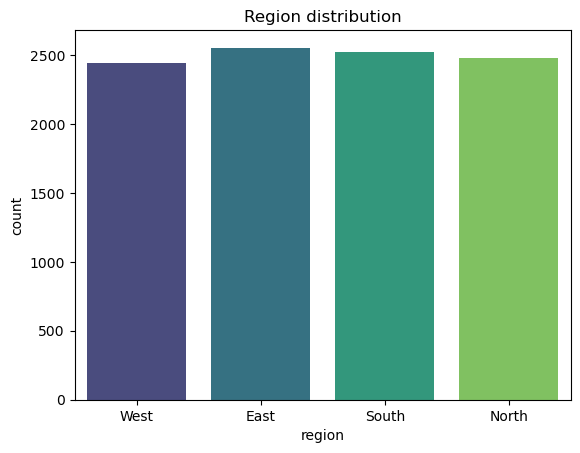

In [29]:
# to find Marital Status distribution
sns.countplot(x = "region",data=df_process,palette='viridis')
plt.title('Region distribution')

### Key Observations from Data Distributions:
* **Skewed Financial Features:** `income`, `savings`, `monthly_expenses`, and `loan_amount` are all right-skewed. This is typical in financial data, where a majority of individuals have lower to moderate values, and a few have very high values (outliers). These outliers were handled later using capping to prevent them from skewing the model.
* **Target Variable Balance:** The `target_default_risk` column is fairly balanced (~51% vs. ~49%), which is excellent. This means we don't need to apply techniques like SMOTE for handling class imbalance.
* **Correlations:** The heatmap reveals a strong positive correlation (0.64) between `income` and `target_default_risk`. This is a surprising insight, suggesting that in this dataset, higher-income individuals might be associated with higher default risk. This could be a key feature for the model.

## 4. Data Preprocessing and Feature Engineering

To prepare the data for modeling, the following steps were taken:

1.  **Handling Outliers:** As seen in the boxplots, several numerical features contained outliers. I used the IQR method to cap these outliers, replacing extreme values with values at the 1.5 * IQR limit. This prevents them from disproportionately influencing the model.
2.  **Feature Dropping:** The `customer_id` and `signup_date` columns were dropped. `customer_id` is a unique identifier with no predictive power, and `signup_date` was engineered into more useful features like year, month, and day.
3.  **Encoding Categorical Data:**
    * **Ordinal Encoding:** The `education` feature has a clear hierarchy (HS < Bachelors < Masters), so it was converted to numerical values using `OrdinalEncoder`.
    * **One-Hot Encoding:** Features like `home_ownership` and `region` have no inherent order, so they were converted into binary columns using `OneHotEncoder`.
4.  **Imputation and Scaling:**
    * Missing numerical values were filled with the `mean` of their respective columns.
    * Missing categorical values were filled with the `most_frequent` of their respective columns.
    * All numerical features were scaled using `StandardScaler` to ensure that features with larger ranges do not dominate the model's learning process.

# Feature Engineering
# Here we will add some logics or make data more relaistice changes to enhancing data to improve modeling.

In [30]:
# Convert 'signup_date' from object to datetime for feature engineering
df_process["signup_date"] = pd.to_datetime(df_process["signup_date"])

In [31]:
# After changing  signup_date into datatime gathering useful information for that feature
df_process["signup_year"] = df_process["signup_date"].dt.year
df_process["signup_month"] = df_process["signup_date"].dt.month
df_process["day"] = df_process["signup_date"].dt.day
df_process["signup_dayofweek"] = df_process["signup_date"].dt.dayofweek

In [32]:
# Drop original 'signup_date' and unique 'customer_id' as they are no longer needed 
df_process.drop(columns=['customer_id',"signup_date" ],axis=1, inplace=True)

In [33]:
# we need to replace Bachlors with Bachelors because it my text mistake or somthing becauseit  make model commplex   
df_process['education'] = df_process['education'].replace({'Bachlors':'Bachelors'})

In [34]:
#listing Continous categorical_features because  some are binary features
continuous_features = ['age', 'income', 'savings', 'monthly_expenses', 
                       'credit_score', 'loan_amount', 'employment_years',
                       'debt_to_income', 'sin_age']

In [35]:
# Loop through each numerical column to cap outliers
for col in continuous_features:
    Q1 = df_process[col].quantile(0.25)
    Q3 = df_process[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Use the clip() function to cap the values
    df_process[col] = df_process[col].clip(lower=lower_bound, upper=upper_bound)

<Axes: >

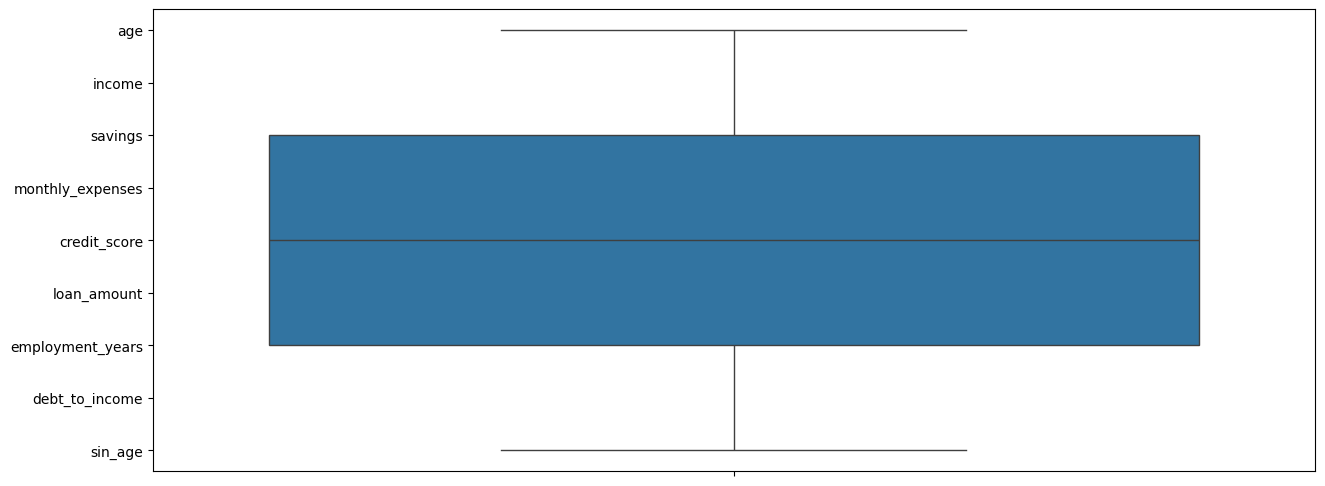

In [36]:
#Boxplot after capping outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=continuous_features)

# Data Preprocessing

In [37]:
X=df_process.drop("target_default_risk",axis=1)
Y=df_process["target_default_risk"]

In [38]:
numerical_columns = X.select_dtypes(include=np.number).columns
categorical_columns = X.select_dtypes(include="object").columns

In [39]:
numerical_columns

Index(['age', 'income', 'savings', 'monthly_expenses', 'num_dependents',
       'credit_score', 'loan_amount', 'loan_term_months', 'employment_years',
       'recent_default', 'has_credit_card', 'signup_dayofweek',
       'debt_to_income', 'sin_age', 'signup_year', 'signup_month', 'day'],
      dtype='object')

In [40]:
categorical_columns

Index(['home_ownership', 'education', 'marital_status', 'region'], dtype='object')

In [41]:
#ordinal Features
ordinal_features=["education"]

In [42]:
ordinal_features

['education']

In [43]:
#ordinal Features
ordinal_categories=["HS","Bachelors","Masters","PhD","Other"]

In [44]:
ordinal_categories

['HS', 'Bachelors', 'Masters', 'PhD', 'Other']

In [45]:
#Nominal Features
nominal_features=categorical_columns.drop("education")

In [46]:
nominal_features

Index(['home_ownership', 'marital_status', 'region'], dtype='object')

# Preprocessing Pipelines for Column Types


### Preprocessing Pipelines
To ensure the data is properly prepared and the workflow is reproducible, I will create preprocessing pipelines for different data types using Scikit-Learn's `Pipeline` and `ColumnTransformer`. This is a best practice that bundles all preprocessing steps (imputation, scaling, encoding) into a single object.

In [47]:
numeric_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='mean')),
    ("scaler",StandardScaler())
])

In [48]:
nominal_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ("onehot",OneHotEncoder(sparse_output=True,drop="first"))

])

In [49]:
ordinal_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ("onehot",OrdinalEncoder(categories=[ordinal_categories]))

])

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transform, numerical_columns),
        ('nominal', nominal_transform, nominal_features),
        ("ordinal",ordinal_transform,ordinal_features)
        
    ],remainder='passthrough'
)

In [51]:
# Fitting the data
preprocessor.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'income', 'savings', 'monthly_expenses', 'num_dependents',
       'credit_score', 'loan_amount', 'loan_term_months', 'employment_years',
       'recent_default', 'has_credit_card', 'signup_dayofweek',
       'debt_to_income', '...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['home_ownership', 'marital_status', 'region'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OrdinalEncoder(categories=[['HS',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'PhD',
                                                                              'Other']]))]),
                                 ['education'])])

In [52]:
# Transforming the data
x_transformed=preprocessor.transform(X)

In [53]:
# data transformed into arrays
x_transformed

array([[-0.96381126,  0.27052289,  1.53920524, ...,  0.        ,
         1.        ,  0.        ],
       [-1.44992175,  0.39173764, -0.91621225, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.34521355, -0.57271144, -0.69092685, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.17388172, -0.72602402, -0.22706131, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11311791, -0.5913948 ,  2.52930073, ...,  0.        ,
         0.        ,  4.        ],
       [-0.96381126, -0.12685435,  0.34171181, ...,  0.        ,
         0.        ,  1.        ]])

In [54]:
# This is important because it includes the one-hot encoded column names 
Feautures=preprocessor.get_feature_names_out()

In [55]:
Feautures

array(['numerical__age', 'numerical__income', 'numerical__savings',
       'numerical__monthly_expenses', 'numerical__num_dependents',
       'numerical__credit_score', 'numerical__loan_amount',
       'numerical__loan_term_months', 'numerical__employment_years',
       'numerical__recent_default', 'numerical__has_credit_card',
       'numerical__signup_dayofweek', 'numerical__debt_to_income',
       'numerical__sin_age', 'numerical__signup_year',
       'numerical__signup_month', 'numerical__day',
       'nominal__home_ownership_OTHER', 'nominal__home_ownership_OWN',
       'nominal__home_ownership_RENT', 'nominal__marital_status_Married',
       'nominal__marital_status_Single',
       'nominal__marital_status_Widowed', 'nominal__region_North',
       'nominal__region_South', 'nominal__region_West',
       'ordinal__education'], dtype=object)

In [56]:
#creating new dataframe for new transformed data because transformed data always in array formet
New_df=pd.DataFrame(x_transformed,columns=Feautures)

In [57]:
#merging target coloum to new data
New_df["target_default_risk"]=df_process["target_default_risk"]

In [58]:
#orginal data
df.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


In [59]:
#New Transformed data
New_df.head()

,numerical__age,numerical__income,numerical__savings,numerical__monthly_expenses,numerical__num_dependents,numerical__credit_score,numerical__loan_amount,numerical__loan_term_months,numerical__employment_years,numerical__recent_default,...,nominal__home_ownership_OWN,nominal__home_ownership_RENT,nominal__marital_status_Married,nominal__marital_status_Single,nominal__marital_status_Widowed,nominal__region_North,nominal__region_South,nominal__region_West,ordinal__education,target_default_risk
0,-0.963811,0.270523,1.539205,0.324355,0.708613,-0.658747,1.221111,0.152381,-0.439487,4.502954,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,-1.449922,0.391738,-0.916212,-0.105483,-0.193160,0.483405,-1.162673,-0.623095,-1.383606,-0.222076,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,1.345214,-0.572711,-0.690927,-0.408150,-1.094933,0.114126,-0.312025,1.703334,-0.941051,-0.222076,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.190701,-0.870707,0.361775,0.595228,-0.193160,0.836582,0.570288,-0.623095,-0.793532,-0.222076,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1.709796,0.068428,-0.933858,1.477794,0.708613,-1.247344,0.415926,-0.623095,1.448751,-0.222076,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1


In [60]:
df.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

In [61]:
New_df.isnull().sum()

numerical__age                     0
numerical__income                  0
numerical__savings                 0
numerical__monthly_expenses        0
numerical__num_dependents          0
numerical__credit_score            0
numerical__loan_amount             0
numerical__loan_term_months        0
numerical__employment_years        0
numerical__recent_default          0
numerical__has_credit_card         0
numerical__signup_dayofweek        0
numerical__debt_to_income          0
numerical__sin_age                 0
numerical__signup_year             0
numerical__signup_month            0
numerical__day                     0
nominal__home_ownership_OTHER      0
nominal__home_ownership_OWN        0
nominal__home_ownership_RENT       0
nominal__marital_status_Married    0
nominal__marital_status_Single     0
nominal__marital_status_Widowed    0
nominal__region_North              0
nominal__region_South              0
nominal__region_West               0
ordinal__education                 0
t

In [62]:
x_new=New_df.drop("target_default_risk",axis=1)
y_new=New_df["target_default_risk"]

#  Data Splitting

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=42)

# Model Training & Hyperparameter Tuning

Now that the data is cleaned and preprocessed, I will train a Decision Tree Classifier. I'll start by training a baseline model with default parameters to establish an initial performance metric. Afterward, I will use `GridSearchCV` to systematically search for the optimal hyperparameters to improve the model's accuracy.

# Logist Regression

In [64]:
logic= LogisticRegression(max_iter=1000)

In [65]:
logic.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [66]:
pred=logic.predict(x_test)

In [67]:
print("accuracy_score and classification report")
print("-"*55)
print("\nTest Accuracy:", accuracy_score(y_test,pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))

accuracy_score and classification report
-------------------------------------------------------

Test Accuracy: 0.931

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       969
           1       0.95      0.91      0.93      1031

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000


Confusion Matrix:
 [[920  49]
 [ 89 942]]


# DecisionTreeClassifier
 

In [68]:
dt = DecisionTreeClassifier(random_state=42)

In [69]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
dt_pred=dt.predict(x_test)

In [71]:
print("accuracy_score and classification report without tuning")
print("-"*60)
print("\nTest Accuracy:", accuracy_score(y_test,dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))

accuracy_score and classification report without tuning
------------------------------------------------------------

Test Accuracy: 0.9165

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       969
           1       0.93      0.91      0.92      1031

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



# Hyper tuning the model for best accuracy

In [72]:
param_grid = {
    'criterion': ['gini',"entropy"],    # splitting criteria
    "splitter" : ["best"],
    'max_depth': [3,7, 8,10 ,None],               # tree depth
    'min_samples_split': [2,3,4,5],        # minimum samples to split
    'min_samples_leaf': [2,8,9],                # minimum samples at leaf
    "max_features" : [None]
}

In [73]:
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [74]:
grid_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 8, 10, None],
                         'max_features': [None], 'min_samples_leaf': [2, 8, 9],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best']},
             scoring='accuracy', verbose=2)

In [75]:
# Best parameters and CV score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validation Score:", grid_search_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.9473750000000001


In [76]:
# Evaluate on test set
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)

In [77]:
print("accuracy_score and classification report with tuning the parameters")
print("-"*70)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

accuracy_score and classification report with tuning the parameters
----------------------------------------------------------------------

Test Accuracy: 0.952

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       969
           1       0.94      0.96      0.95      1031

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# RandomForestClassifier 

In [78]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [79]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [80]:
rf_pre=rf.predict(x_test)

In [81]:
print("accuracy_score and classification report without tuning")
print("-"*55)
print("\nTest Accuracy:", accuracy_score(y_test,rf_pre))
print("\nClassification Report:\n", classification_report(y_test, rf_pre))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pre))

accuracy_score and classification report without tuning
-------------------------------------------------------

Test Accuracy: 0.9425

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       969
           1       0.95      0.94      0.94      1031

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


Confusion Matrix:
 [[921  48]
 [ 67 964]]


# Hyper tuning the model for best accuracy

In [82]:
param_grid_rf = {
    'n_estimators': [200,250],       
    'max_depth': [20, None],           
    'min_samples_split': [5,6],            
    'min_samples_leaf': [1, 2],       
    'criterion': ['entropy']       
}



In [83]:
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.9359999999999999


In [ ]:
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(x_test)

In [ ]:
print("accuracy_score and classification report with tuning")
print("-"*55)
print("\nTest Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy_score and classification report with tuning
-------------------------------------------------------

Test Accuracy: 0.9455

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       969
           1       0.95      0.94      0.95      1031

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix:
 [[922  47]
 [ 62 969]]


# SVM

In [ ]:
svm_model=SVC()

In [ ]:
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
svm_pred=svm_model.predict(x_test)

In [ ]:
print("accuracy_score and classification report without tuning")
print("-"*55)
print("\nTest Accuracy:", accuracy_score(y_test,svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))

accuracy_score and classification report without tuning
-------------------------------------------------------

Test Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       969
           1       0.95      0.92      0.94      1031

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000


Confusion Matrix:
 [[924  45]
 [ 85 946]]


v

In [ ]:

param_grid = {
    'C': [0.1,0.01,1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear',"poly"]
}

In [ ]:
grid_search_sv= GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search_sv.fit(x_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=2)

In [ ]:
print("\nBest parameters found: ", grid_search_sv.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_sv.best_score_))


Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.94


In [ ]:
best_model = grid_search_sv.best_estimator_
pred_sv = best_model.predict(x_test)

In [ ]:
print("accuracy_score and classification report with tuning")
print("-"*55)
print("\nTest Accuracy:", accuracy_score(y_test,pred_sv))
print("\nClassification Report:\n", classification_report(y_test, pred_sv))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_sv))

accuracy_score and classification report with tuning
-------------------------------------------------------

Test Accuracy: 0.937

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       969
           1       0.95      0.92      0.94      1031

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


Confusion Matrix:
 [[923  46]
 [ 80 951]]


# XGboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss'
)

In [ ]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
xgb_pred=xgb_classifier.predict(x_test)

In [ ]:
print("accuracy_score and classification report without tuning")
print("-"*55)
print("\nTest Accuracy:", accuracy_score(y_test,xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

accuracy_score and classification report without tuning
-------------------------------------------------------

Test Accuracy: 0.9565

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       969
           1       0.96      0.95      0.96      1031

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000


Confusion Matrix:
 [[929  40]
 [ 47 984]]


# Hyper tuning the model for best accuracy

In [ ]:
param_grid_xg = {
    'max_depth': [8,],
    'learning_rate': [0.07],
    'n_estimators': [150],
    'gamma': [0.14],
    'subsample': [1],
    'colsample_bytree': [1],
    'reg_alpha': [ 0.05],
    'reg_lambda': [3],
    'min_child_weight': [3]
}

In [ ]:
grid_search_focused = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xg,
    scoring='accuracy',
    cv=8,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search_focused.fit(x_train, y_train)


Fitting 8 folds for each of 1 candidates, totalling 8 fits


GridSearchCV(cv=8,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'gamma': [0.14],
                         'learning_rate': [0.07], 'max_depth': [8],
                         'min_child_weight': [3], 'n_estimators': [150],
                         'reg_alpha': [0.05], 'reg_lambda': [3],
                         'subsample': [1]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameters found: ", grid_search_focused.best_params_)
print("Best Cross-Validation Score:{:.4f}".format(grid_search_focused.best_score_))

Best parameters found:  {'colsample_bytree': 1, 'gamma': 0.14, 'learning_rate': 0.07, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 150, 'reg_alpha': 0.05, 'reg_lambda': 3, 'subsample': 1}
Best Cross-Validation Score:0.9546


In [ ]:
best_model_xg = grid_search_focused.best_estimator_
pred_xg = best_model_xg.predict(x_test)

In [ ]:
print("accuracy_score and classification report with tuning")
print("-"*55)
print("\nTest Accuracy:", accuracy_score(y_test,pred_xg))
print("\nClassification Report:\n", classification_report(y_test, pred_xg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_xg))

accuracy_score and classification report with tuning
-------------------------------------------------------

Test Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       969
           1       0.96      0.96      0.96      1031

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000


Confusion Matrix:
 [[931  38]
 [ 42 989]]


# Conclusion
This project successfully developed a machine learning model capable of predicting loan default risk with high accuracy. After a thorough process of data cleaning, feature engineering, and hyperparameter tuning, the XGBoost Classifier was identified as the top-performing model, achieving a final accuracy of 96% on the test data.

The key findings indicate that while the dataset was well-balanced, features related to a customer's financial profile, such as income and debt-to-income ratio, were significant predictors of default risk. The use of Scikit-Learn's ColumnTransformer and Pipeline ensured a reproducible and robust preprocessing workflow, which was critical for achieving reliable model performance.

Future improvements could include exploring more advanced feature engineering techniques, experimenting with other ensemble models like CatBoost or LightGBM, or deploying the final model as an interactive web application to provide real-time risk assessments.